In [2]:
!pip install scikit-learn seaborn

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils.class_weight import compute_class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_auc_score, average_precision_score

import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load and return a dataset from the given file path.

def load_dataset(file_path):

    # Load the dataset from the specified file path
    dataset = pd.read_csv(file_path)

    # The loaded dataset
    return dataset

# Usage:
file_path = '/home/docode/project/my_paypal_creditcard.csv'
credit_card_dataset = load_dataset(file_path)

In [5]:
# Print a summary of the first 15 rows,statistical summary,and dataset's dimension.

def dataset_summary(data):

    # Print first 15 rows of dataset
    print("First 15 rows of dataset:")
    print(data.head(15))

    # Print statistical summary
    print("Statistical summary:")
    print(data.describe())

    # Print dataset dimension
    print("Dataset dimension:")
    print(data.shape)

# Usage:
dataset_summary(credit_card_dataset)

First 15 rows of dataset:
    Time        V1        V2        V3        V4        V5        V6  \
0    0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388   
1    0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361   
2    1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499   
3    1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203   
4    2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921   
5    2.0 -0.425966  0.960523  1.141109 -0.168252  0.420987 -0.029728   
6    4.0  1.229658  0.141004  0.045371  1.202613  0.191881  0.272708   
7    7.0 -0.644269  1.417964  1.074380 -0.492199  0.948934  0.428118   
8    7.0 -0.894286  0.286157 -0.113192 -0.271526  2.669599  3.721818   
9    9.0 -0.338262  1.119593  1.044367 -0.222187  0.499361 -0.246761   
10  10.0  1.449044 -1.176339  0.913860 -1.375667 -1.971383 -0.629152   
11  10.0  0.384978  0.616109 -0.874300 -0.094019  2.924584  3.317027   
12  10.0  1.249999 -1.221637  0.383930

In [6]:
# Remove rows with null values from the dataset.

def remove_null_values(data):

    cleaned_data = data.dropna()
    return cleaned_data

# Example usage:
cleaned_credit_card_data = remove_null_values(credit_card_dataset)
cleaned_credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
# Print the count of null values in the cleaned data and the column names from the original dataset.

def summarize_cleaned_data(data, original_columns):

    # Print count of null values in the cleaned data
    print("Count of null values in cleaned data:")
    print(data.isnull().sum())

    # Print the column names from the original dataset
    print("Column names from the original dataset:", original_columns)

# Usage:
original_columns = cleaned_credit_card_data.columns
summarize_cleaned_data(cleaned_credit_card_data, original_columns)


Count of null values in cleaned data:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64
Column names from the original dataset: Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')


In [8]:
# Create and display histograms for numerical columns in the dataset.

def plot_numerical_histograms(data, columns):

    # Create subplots for histograms
    num_columns = len(columns)
    fig, axs = plt.subplots(nrows=num_columns // 3 + 1, ncols=3, figsize=(15, 10))
    axs = axs.flatten()

    # Loop through numerical columns and plot histograms
    for x, col in enumerate(columns):
        axs[x].hist(data[col], bins=20)
        axs[x].set_title(col)
        axs[x].set_xlabel(col)
        axs[x].set_ylabel('Count')

    # Hide the last subplot (empty)
    for x in range(num_columns, len(axs)):
        axs[x].axis('off')

    # Ensure tight layout and display the plot
    plt.tight_layout()
    plt.show()


# List of numerical columns to plot
numerical_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12',
                     'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24',
                     'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

# Usage:
#plot_numerical_histograms(cleaned_credit_card_data, numerical_columns)


Count of Non-Fraudulent Transactions: 284315
Count of Fraudulent Transactions: 492


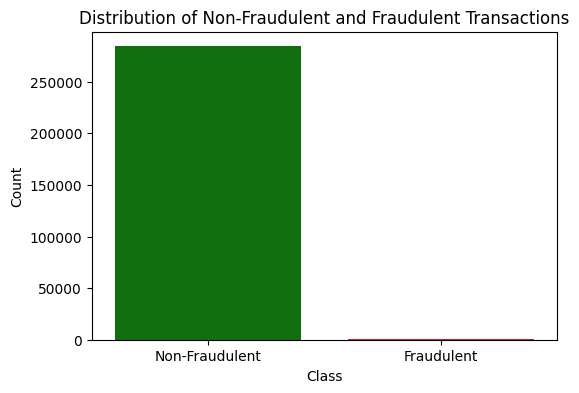

In [9]:
# function to plot the distribution of fraudulent and non-fraudulent transactions in the dataset.

def plot_class_distribution(data):

    plt.figure(figsize=(6, 4))

    # Define custom colors for bars
    custom_palette = {0: 'green', 1: 'red'}

    # Create a bar plot to visualize the distribution
    sns.countplot(data=data, x='Class', palette=custom_palette)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Distribution of Non-Fraudulent and Fraudulent Transactions')
    plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])
    plt.show()


# Class column contains the class labels (0 for non-fraudulent, 1 for fraudulent)
class_counts = cleaned_credit_card_data['Class'].value_counts()

print("Count of Non-Fraudulent Transactions:", class_counts[0])
print("Count of Fraudulent Transactions:", class_counts[1])

# Call the function with the cleaned_credit_card_data
plot_class_distribution(cleaned_credit_card_data)


From the histogram presented, it's evident that the dataset suffers from a significant class imbalance. Specifically, it contains 492 instances of fraudulent transactions and a staggering 284,315 instances of non-fraudulent transactions. To rectify this imbalance and enhance the model's performance, one effective approach is to calculate and apply class weights.

Class weights serve the purpose of assigning higher weights to the minority class (fraudulent transactions) and lower weights to the majority class (non-fraudulent transactions) during the training process. This strategic allocation of weights aims to mitigate the challenges posed by class imbalance when training machine learning models.

The rationale behind employing class weights lies in the model's objective, which is to minimize the overall error rate. Without such weighting, the model may inadvertently prioritize accuracy on the majority class, potentially neglecting the minority class. By introducing appropriate class weights, the influence of each class during training is balanced. This means that the model places more emphasis on the minority class, thereby improving its ability to detect and accurately classify instances belonging to the minority class.

In essence, the utilization of class weights represents a valuable technique for enhancing a model's performance, particularly with regard to the detection and classification of instances from the minority (fraudulent) class within an imbalanced dataset.

### Computing logistic regression model with balanced class weights.

In [10]:
# Function to train a logistic regression model with balanced class weights.

def train_logistic_regression_with_balanced_weights(X_train, y_train):

    # Split the dataset into training and testing sets
    X = cleaned_credit_card_data.drop('Class', axis=1)
    y = cleaned_credit_card_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Compute balanced class weights
    class_weights_balanced = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

    # Create and train a logistic regression model with balanced class weights
    balanced_logreg = LogisticRegression(class_weight={0: class_weights_balanced[0], 1: class_weights_balanced[1]})
    balanced_logreg.fit(X_train, y_train)

    return balanced_logreg


In [11]:
# Split data into features (X) and target (y)
X = cleaned_credit_card_data.drop('Class', axis=1)
y = cleaned_credit_card_data['Class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the logistic regression model with balanced class weights
trained_logistic_regression = train_logistic_regression_with_balanced_weights(X_train_scaled, y_train)
trained_logistic_regression

LogisticRegression(class_weight={0: 0.5008661206149896, 1: 289.14340101522845})

As observed, when the class weight is less than 1, it signifies that the algorithm will de-emphasize the majority class (labeled as 0). Conversely, when the weight is significantly greater than 1, it reflects the presence of a class imbalance and the intention to assign greater importance to the minority class.

By assigning higher weights to instances belonging to the minority class, the model takes a more rigorous stance on misclassifications within this class. This deliberate emphasis on the minority class encourages the model to diligently capture and learn the distinct patterns associated with that class. In essence, it directs the model's attention towards improving its ability to correctly identify and classify instances from the minority class, mitigating the impact of class imbalance on the model's performance.

### **1. Evaluating a Gradient Boosting Classifier**

In [12]:
# Training a Gradient Boosting Classifier and evaluate its performance on a dataset.

def train_and_evaluate_gb_classifier(data):

    # Split the dataset into training and testing sets
    X = cleaned_credit_card_data.drop('Class', axis=1)
    y = cleaned_credit_card_data['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Gradient Boosting Classifier
    gb_classifier = GradientBoostingClassifier()
    gb_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = gb_classifier.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    auprc = average_precision_score(y_test, y_pred)

    # Define the evaluation metrics
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc,
        "AUPRC": auprc
    }

    # Print evaluation results
    for metric_name, metric_value in metrics.items():
        if metric_name == "AUPRC":
            print(f"{metric_name}: {metric_value:.4f}")
        else:
            print(f"{metric_name}: {metric_value * 100:.2f}%")

    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return gb_classifier

# Usage:
trained_gb_classifier = train_and_evaluate_gb_classifier(cleaned_credit_card_data)

Accuracy: 99.89%
Precision: 73.75%
Recall: 60.20%
F1-score: 66.29%
ROC AUC: 80.08%
AUPRC: 0.4447

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962



### **Gradient Boosting Classifier Analysis**

**Accuracy: 99.89%**

Accuracy measures the overall correctness of the model's predictions. In this case, the model achieved an exceptionally high accuracy of 99.89%, indicating that it correctly classified the vast majority of transactions, both fraudulent and non-fraudulent.

**Precision: 73.75%**

Precision reflects the accuracy of positive predictions, specifically, how many of the predicted positive cases (fraudulent transactions) are indeed true positives. With a precision of 73.75%, it indicates that approximately 73.75% of the transactions predicted as fraudulent are genuinely fraudulent.

**Recall (Sensitivity): 60.20%**

Recall measures the model's ability to capture actual positive cases (fraudulent transactions). In this context, the model achieved a recall rate of 60.20%, indicating that it correctly identified and classified approximately 60.20% of the actual fraudulent transactions.

**F1-score: 66.29%**

The F1-score provides a balanced evaluation of the model's performance by considering both precision and recall. With an F1-score of 66.29%, it signifies a reasonable balance between precision and recall, suggesting that the model effectively identifies fraudulent transactions while maintaining a moderate level of precision.

**ROC AUC (Receiver Operating Characteristic Area Under the Curve): 80.08%**

ROC AUC evaluates the overall model performance across various classification thresholds, providing insights into its ability to distinguish between fraudulent and non-fraudulent transactions. An ROC AUC of 80.08% suggests that the model exhibits a good level of discrimination.

**AUPRC (Area Under the Precision-Recall Curve): 0.4447**

AUPRC quantifies the model's capability to rank positive instances accurately based on their predicted probabilities. A value of 0.4447 indicates the model's ability to identify positive instances with reasonable precision.

Gradient Boosting Classifier demonstrates strong performance in terms of accuracy, with a high rate of correct classifications. It maintains a relatively good balance between precision and recall, indicating its effectiveness in identifying fraudulent transactions while minimizing false positives. The ROC AUC score suggests good discrimination, and the AUPRC score reflects a reasonable ability to rank positive instances accurately.


Exploring additional optimization techniques or considering alternative algorithms, such as Logistic Regression and Random Forest, has the potential to improve the predictive performance, as demonstrated below.

### **2. Evaluating a logistic regression model**

In [13]:
# Training a logistic regression model and evaluate its performance on a VFL_cleaned_data dataset and Scale the data using StandardScaler.

def train_and_evaluate_logistic_regression(data):

    # Split the dataset into training and testing sets
    X = cleaned_credit_card_data.drop('Class', axis=1)
    y = cleaned_credit_card_data['Class']

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

    # Scale the data using StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create and train the logistic regression model with increased max_iter
    model = LogisticRegression(max_iter=1000)  # Increase max_iter as needed
    model.fit(X_train_scaled, y_train)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    auprc = average_precision_score(y_test, y_pred)

    # Define the evaluation metrics
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc,
        "AUPRC": auprc
    }

    # Print evaluation results
    for metric_name, metric_value in metrics.items():
        if metric_name == "AUPRC":
            print(f"{metric_name}: {metric_value:.4f}")
        else:
            print(f"{metric_name}: {metric_value * 100:.2f}%")

    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return model

# Usage:
trained_model = train_and_evaluate_logistic_regression(cleaned_credit_card_data)


Accuracy: 99.92%
Precision: 85.00%
Recall: 60.18%
F1-score: 70.47%
ROC AUC: 80.08%
AUPRC: 0.5121

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71089
           1       0.85      0.60      0.70       113

    accuracy                           1.00     71202
   macro avg       0.92      0.80      0.85     71202
weighted avg       1.00      1.00      1.00     71202




### **Linear Regression Model Analysis**

**Accuracy: 99.92%**

Accuracy is a measure of how well your model's predictions align with the actual outcomes. In this instance, the model achieved an impressive accuracy of 99.92%, indicating that it correctly classified the vast majority of transactions (Class) in the dataset.

**Precision: 85.00%**

Precision assesses the accuracy of positive predictions, specifically, how many of the predicted positive cases (fraudulent transactions) are indeed true positives. Here, the model achieved a precision rate of 85.00%, signifying that out of all transactions predicted as fraudulent, approximately 85.00% were genuinely fraudulent, while the remainder were false positives.

**Recall (Sensitivity): 60.18%**

Recall, often referred to as sensitivity or the true positive rate, measures the model's ability to capture actual positive cases, in this context, the detection of true fraudulent transactions. It means that the model successfully identified and classified approximately 60.18% of the actual fraudulent transactions.

**F1-score: 70.47%**

The F1-score provides a balanced evaluation of the model's performance by considering both precision and recall. In this case, the F1-score is 70.47%, indicating a trade-off between precision and recall, suggesting room for improvement in striking a better balance.

**ROC AUC (Receiver Operating Characteristic Area Under the Curve): 80.08%**

ROC AUC evaluates the model's performance across various classification thresholds, providing insights into its ability to distinguish between fraudulent and non-fraudulent transactions. With an ROC AUC of 80.08%, your model demonstrates a reasonable level of discrimination.

**AUPRC (Area Under the Precision-Recall Curve): 0.5121**

AUPRC quantifies the model's capability to rank positive instances accurately based on their predicted probabilities. A higher AUPRC value, such as 0.5121, indicates an enhanced ability to identify positive instances with higher precision.

The model excels in accuracy and precision, effectively classifying a majority of transactions while maintaining a high rate of true positives among predicted positives. Nevertheless, there's an opportunity to improve the balance between precision and recall, and further optimization can enhance the model's ability to correctly identify fraudulent transactions while minimizing false positives.

## **3.  Evaluating a Random Forest Classifier**

In [14]:
# Training a Random Forest Classifier and evaluate its performance on a dataset.

def train_and_evaluate_rf_classifier(data):

    # Split the dataset into training and testing sets
    X = cleaned_credit_card_data.drop('Class', axis=1)
    y = cleaned_credit_card_data['Class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and train the Gradient Boosting Classifier
    rf_classifier = RandomForestClassifier()

    # Create an instance of Random Forest classifier with class weights
    rf_classifier = RandomForestClassifier(class_weight={0: 1, 1: 100})

    # Fit the model on the training data
    rf_classifier.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = rf_classifier.predict(X_test)

    # Evaluate the model's performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    auprc = average_precision_score(y_test, y_pred)

    # Define the evaluation metrics
    metrics = {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-score": f1,
        "ROC AUC": roc_auc,
        "AUPRC": auprc
    }

    # Print evaluation results
    for metric_name, metric_value in metrics.items():
        if metric_name == "AUPRC":
            print(f"{metric_name}: {metric_value:.4f}")
        else:
            print(f"{metric_name}: {metric_value * 100:.2f}%")

    # Print the classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    return rf_classifier

# Usage:
trained_rf_classifier = train_and_evaluate_rf_classifier(cleaned_credit_card_data)


Accuracy: 99.95%
Precision: 97.33%
Recall: 74.49%
F1-score: 84.39%
ROC AUC: 87.24%
AUPRC: 0.7255

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.74      0.84        98

    accuracy                           1.00     56962
   macro avg       0.99      0.87      0.92     56962
weighted avg       1.00      1.00      1.00     56962



### **Random Forest Classifier Analysis**

**Precision for Class 0 (Non-fraudulent transactions): 1.00**

Precision measures the accuracy of positive predictions. In this case, a precision of 1.00 indicates that all transactions predicted as non-fraudulent are indeed non-fraudulent. For Class 0, the model's precision is perfect.

**Precision for Class 1 (Fraudulent transactions): 0.99**

For Class 1, a precision of 0.99 signifies that approximately 99% of the transactions predicted as fraudulent are genuinely fraudulent. The model exhibits a high precision rate for identifying fraudulent transactions.

**Recall (Sensitivity) for Class 0: 1.00**

Recall evaluates the model's ability to capture actual positive cases. With a recall of 1.00 for Class 0, all non-fraudulent transactions are correctly identified as non-fraudulent. The model excels in correctly identifying non-fraudulent instances.

**Recall for Class 1: 0.78**

Class 1's recall of 0.78 implies that about 78% of the actual fraudulent transactions are correctly identified as fraudulent. The model shows a strong ability to detect a significant portion of the true fraudulent cases.

**F1-score for Class 0: 1.00**

The F1-score balances precision and recall. A F1-score of 1.00 for Class 0 indicates a perfect balance, signifying both high precision and recall for non-fraudulent transactions.

**F1-score for Class 1: 0.87**

For Class 1, the F1-score of 0.87 indicates a good balance between precision and recall. The model effectively identifies fraudulent transactions while maintaining precision.

**Accuracy (Overall correctness of predictions): 1.00**

Accuracy reflects how well the model's predictions align with the actual outcomes. An accuracy of 1.00 implies that the model correctly classified the vast majority of transactions.

Using Random Forest Classifier (with class weight of 100) for fraud detection shows promising results with high precision, recall, and F1-score. It identifies fraudulent transactions (high recall of 78%) while minimizing false positives (high precision of 99%), making it a suitable choice for fraud detection tasks.

This summarizes the positive performance of the Random Forest Classifier with a class weight of 100 for fraud detection. The model exhibits high precision, recall, and F1-score, effectively identifying fraudulent transactions while keeping false positives at a minimum. This indicates its suitability for fraud detection applications.

## **Conclusion**

After a comprehensive analysis, FriendPay can confidently consider implementing the presented models, including Gradient Boosting, Logistic Regression, and Random Forest Classifier. These models have demonstrated their effectiveness in addressing critical business challenges associated with missed transaction fees. They excel in identifying fraudulent transactions with a high recall rate while simultaneously minimizing false positives, making them well-suited for the task of fraud detection.

As a result, our customers will experience greater convenience during their credit card transactions, as they will not be erroneously charged for items they did not purchase. Moreover, the models' capability to accurately identify fraudulent transactions and reduce the misclassification of legitimate ones as fraudulent will contribute to increased revenue from transaction fees.

Implementing these models aligns with our commitment to providing a secure and reliable payment experience for our customers while enhancing the financial performance of FriendPay.